# PyTorch Fundamentals

In this notebook i'll be learning PyTorch and practicing the fundamentals? 

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.2+cu118


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


## 1. Introduction to Tensors

### Creating Tensors

Tensors in PyTorch and ML i general refer simply to Multidimensional arrays that support algebraic operations.

One can create PyTorch tensors using `torch.tensor()`.
Read More: https://docs.pytorch.org/docs/stable/tensors.html

In [3]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim

0

In [5]:
# Vector
vec = torch.tensor([2, 9])
vec

tensor([2, 9])

In [6]:
vec.ndim

1

In [7]:
# MATRIX
MATRIX = torch.tensor([[3, 8], [6, 9]])
MATRIX

tensor([[3, 8],
        [6, 9]])

In [8]:
MATRIX.ndim

2

In [9]:
# TENSOR (3D+)
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [10]:
TENSOR.ndim

3

### Random Tensors

Why would you want a random tensor?

Many neural networks require starting with a randomized tensor so it can adjust them to represent the data more accuratly.

In [11]:
# Create a random tensor of size (4, 5)
random_tensor = torch.rand(4, 5)
random_tensor

tensor([[0.9838, 0.8790, 0.4382, 0.6226, 0.6427],
        [0.0872, 0.1887, 0.6908, 0.5484, 0.7084],
        [0.1210, 0.3655, 0.8094, 0.0654, 0.4403],
        [0.8089, 0.7067, 0.1504, 0.8002, 0.6119]])

In [12]:
# Create a random tensor with the shape of an image tensor
random_image_tensor = torch.rand(size=(224, 224, 3))
random_image_tensor.shape

torch.Size([224, 224, 3])

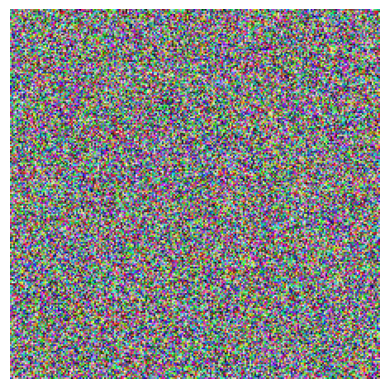

In [13]:
plt.imshow(random_image_tensor.numpy())
plt.axis('off')
plt.show()

### Zeros and ones

In [14]:
# Create a tensor of all zeros
zeros = torch.zeros(3, 2, 2)
zeros

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [15]:
# Create a tensor of all ones
ones = torch.ones(3, 2, 2)
ones

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

### Creating a range of tensors and tensors-like

In [16]:
# Use torch.range()
one_to_ten = torch.arange(1, 11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
# Tensors-like
ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Biggest Tensor errors in PyTorch & deep learning:

There are 3 major errors that one can run into when using deep learning libraries, and they are related to the most important attributes of tensors:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not in the right device

In [20]:
# Tensor most important attributes
TENSOR = torch.tensor([3, 2, 4],
                      dtype=None, # What datatype are the tensor's elements
                      device=None, # What device is the tensor on
                      requires_grad=False) # Whether or not to track
TENSOR
                      

tensor([3, 2, 4])

### Getting informations from tensors

1. To get datatype from a tensor, can use `tensor.dtype`
2. To get shape from a tensor, can use `tensor.shape`
3. To get device from a tensor, can use `tensor.device`

In [21]:
TENSOR.dtype

torch.int64

In [22]:
TENSOR.shape

torch.Size([3])

In [23]:
TENSOR.device

device(type='cpu')

### Tensor Bending (TensorOps)

Tensor operations include:
- Addition
- Substraction
- Multiplication (element-wise)
- Division
- Matrix Multiplication

In [28]:
#Create TEnsor
tensor = torch.tensor([1, 2, 3])
tensor

tensor([1, 2, 3])

In [29]:
tensor * 10

tensor([10, 20, 30])

In [30]:
tensor + 10

tensor([11, 12, 13])

In [31]:
# Builtin funcs
torch.mul(tensor, 10)

tensor([10, 20, 30])

### Matrix multiplication

Two main ways of performing multiplication on tensor:
1. Element-wise multiplication.
2. Matrix Multiplication (dot product).

**Note:**
Rules to be respected:
1. The **inner dimensions** must match. `(a, b) @ (c, d)` in this case $b$ should equal $c$.
2. The resulting matrix have the shape of the **outer dimensions**. `(a, b) @ (c, d) = (a, d)`.

In [36]:
# Element-wise
print (tensor, "*", tensor, f"= {tensor * tensor}",)

tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor([1, 4, 9])


In [37]:
# Matrix Multiplication
print (tensor, "*", tensor, f"= {tensor.matmul(tensor)}",)

tensor([1, 2, 3]) * tensor([1, 2, 3]) = 14


### ALERT: Shape error!

In [38]:
# Shapes for MatMul
tensor_A = torch.tensor([[1, 2],[3, 4],[5, 6]])
tensor_B = torch.tensor([[7, 10],[8, 11],[9, 12]])

# mm is same as matmul or @ operator
torch.mm(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

One way to fix the shape issue is to **transpose**.

A **transpose** switches the axes of a given tensor.

In [39]:
# We can transpose one of them
print(tensor_B.T)
torch.mm(tensor_A, tensor_B.T)

tensor([[ 7,  8,  9],
        [10, 11, 12]])


tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [41]:
# we can transpose A too and get a totally different matrix
torch.mm(tensor_A.T, tensor_B)

tensor([[ 76, 103],
        [100, 136]])

### Tensor aggregation (finding the min, max, sum etc)

In [42]:
# Create Tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [43]:
# find min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
# find max
torch.max(x), x.max()

In [50]:
# find mean - the function requires a tensor of float32 dtype
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [51]:
# find sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [52]:
# find the positional min and max
x.argmin(), x.argmax()

(tensor(0), tensor(9))

### Reshaping, stacking, squeezing and unsquezzing tensors

- Reshaping - reshapes and input tensor to a defined shape.
- View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor
- Stacking - Combine multiple tensors on top of each other (vstack) or side by side (hstack).
- Squeeze - remove all `1` dimensions from a tensor.
- Unsqueeze - add a 1 dimension to a target tensor.
- Permute - Return a view of the input with dimensions permuted (swapped) in a certain way.

In [53]:
# Create Tensor
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [62]:
# Add Extra dimention
x_reshaped = x.reshape(3, 3)
x_reshaped

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [63]:
# CChange the view
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [64]:
# Changing z changes x (because a view of a tensor is like a shallow copy of it)
z[:,0] = 10
z, x

(tensor([[10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]]),
 tensor([10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]))

In [73]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x], dim=0)
x_stacked

tensor([[10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]])

In [101]:
# Unsqueeze those tensors
z = torch.unsqueeze(x, dim=1)
z = torch.unsqueeze(z, dim=0)
z = torch.unsqueeze(z, dim=0)
z = torch.unsqueeze(z, dim=0)
z = torch.unsqueeze(z, dim=1)
z

tensor([[[[[[10.],
            [ 2.],
            [ 3.],
            [ 4.],
            [ 5.],
            [ 6.],
            [ 7.],
            [ 8.],
            [ 9.]]]]]])

In [102]:
# Squeeze those tensors - Remove all single dims (1, 1, 1, 9) becomes (9)
z.squeeze()

tensor([10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [106]:
# Permute the tensor - rearrange dimensions in a specified order
x_origin = torch.rand(224, 224, 3) #like image
x_permuted = x_origin.permute(2, 0, 1)
x_origin.shape, x_permuted.shape

(torch.Size([224, 224, 3]), torch.Size([3, 224, 224]))

In [109]:
# a Permution is still only a view of the original
x_origin[0][0][0] = 100
x_origin[0][0][0], x_permuted[0][0][0]

(tensor(100.), tensor(100.))

### Indexing (select from tensor)

In PyTorch indexing is similar to numpy.
All python basic indexing technics work here too.
(Too lazy to include tests these must be obvious)

### PyTorch tensors & NumPy

PyTorch is based on NumPy so you can use some Numpy Functionalities on tensors.

In [128]:
#NumPy array to tensor
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array , tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [129]:
# Change value of the array
array = array + 1
array , tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [131]:
# Tensor to NumPy array
tensor = torch.ones(9)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Different Ways of accessing a GPU

GPU = CUDA + NVIDIA hardware makes them computationally faster than CPU for these kinda operations.

#### Getting a GPU
1. Using Google Colab to get free GPU (upgradable in pro plan)
2. Use own GPU
3. Use cloud computing - GCP, AWS, Azure ...

In [132]:
!nvidia-smi

Sat May 17 10:58:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.51.03              Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   64C    P0             77W /   94W |    2509MiB /   8192MiB |     43%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Check for GPU access with Pytorch

In [133]:
torch.cuda.is_available()

True

In [135]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [136]:
# Count number of devices
torch.cuda.device_count()

1

Since PyTorch can compute in both CPU and GPU, it's best practice to setup device agnostic code.
To Read More: https://docs.pytorch.org/docs/stable/notes/cuda.html#best-practices

#### Putting tensors and models on the GPU

USing a GPU results in faster computations.

In [138]:
# Create a tensor (default is on GPU)
tensor = torch.tensor([1, 2, 3])
tensor.device

device(type='cpu')

In [139]:
#Move it to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

#### Move tensors back to CPU

In [140]:
#If tensor is can't transform it to NumPy
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [141]:
#To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_cpu

array([1, 2, 3])

In [142]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')